# Laboratory session 04

 Capettini Hilario (Matricola N. 2013031)

## Six Boxes Toy Model : inference


- The six boxes toy model is described in reference [1].

- Labeling the boxes as follows:

<img src="Images\boxes.png">

- write a program in R that:


### allows the user to insert the color of a randomly extracted box and


In [1]:
library("tibble")
library("tidyverse")
library("magrittr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
#This function allow the user to estimate the posterior for this problem
#given as an input the color of the new ball and also the value of the prior

SBTM <- function(color,prior){
            #Initialize lk
            lk <- vector(mode ="double",length=6)
    
            #Estimate likelihood
            for (j in c(0:5)){
                if (color =='w')     {lk[j+1] <- j/5}
                else if (color =='b'){lk[j+1] <- (5-j)/5}
            }
        
            #Estimate the evidence
            ev <- lk%*%prior
    
            posterior <- lk*prior/as.vector(ev)
            return(posterior)
        }

### prints on the standard output the probability of selecting each box


The following cell allows the user to insert the colors in an iterative manner, the inputs
must be w for white and b for black, any other input ends the process. 

After the new color insertion an updated table with the standard output is displayed.

In [3]:
#We initialize the prior
initial_prior <- rep(0.167,6)

#Initialize a tibble to keep the results
results <- tibble(
  k  = numeric(),
  H0 = numeric(),
  H1 = numeric(),
  H2 = numeric(),
  H3 = numeric(),
  H4 = numeric(),
  H5 = numeric()  
)

a <- initial_prior

for (i in c(1:100)){
    #this read your measurement
    cat('')
    measure <- readline(prompt="Enter a color (w or b): ")
    if (measure !='w' && measure !='b') {break}
    
    a <- SBTM(measure,a)
    results %<>% add_row(k = i, H0 = a[1], H1 = a[2], H2 = a[3],H3 = a[4],H4 = a[5],H5 = a[6])
    Sys.sleep(0.1)
    print.data.frame(results,digits=2,row.names=FALSE)
    cat('')
    flush.console()
    #print(results)
}

Enter a color (w or b): w
 k H0    H1   H2  H3   H4   H5
 1  0 0.067 0.13 0.2 0.27 0.33
Enter a color (w or b): w
 k H0    H1    H2   H3   H4   H5
 1  0 0.067 0.133 0.20 0.27 0.33
 2  0 0.018 0.073 0.16 0.29 0.45
Enter a color (w or b): w
 k H0     H1    H2   H3   H4   H5
 1  0 0.0667 0.133 0.20 0.27 0.33
 2  0 0.0182 0.073 0.16 0.29 0.45
 3  0 0.0044 0.036 0.12 0.28 0.56
Enter a color (w or b): w
 k H0     H1    H2    H3   H4   H5
 1  0 0.0667 0.133 0.200 0.27 0.33
 2  0 0.0182 0.073 0.164 0.29 0.45
 3  0 0.0044 0.036 0.120 0.28 0.56
 4  0 0.0010 0.016 0.083 0.26 0.64
Enter a color (w or b): w
 k H0      H1     H2    H3   H4   H5
 1  0 0.06667 0.1333 0.200 0.27 0.33
 2  0 0.01818 0.0727 0.164 0.29 0.45
 3  0 0.00444 0.0356 0.120 0.28 0.56
 4  0 0.00102 0.0163 0.083 0.26 0.64
 5  0 0.00023 0.0072 0.055 0.23 0.71
Enter a color (w or b): b
 k H0      H1     H2    H3   H4   H5
 1  0 0.06667 0.1333 0.200 0.27 0.33
 2  0 0.01818 0.0727 0.164 0.29 0.45
 3  0 0.00444 0.0356 0.120 0.28 0.56
 4

### plots the probability for each box as a function of the extraction step


In [4]:
library(showtext)
showtext_auto()
library("scales")

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

Loading required package: sysfonts
Loading required package: showtextdb

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [5]:
plt <- function(results){
set_plot_dimensions(8, 3)
colors <- c('H0' = "#F8766D", 'H1' = "#7CAE00", 'H2' = "#00BFC4", 'H3' = "#C77CFF", 'H4' = "#1F77B4", 'H5' = "#D62728")

ggplot(results, aes(x = k)) +
    geom_line (aes(y = H0, color = 'H0')) +
    geom_point(aes(y = H0, color = 'H0')) +
    geom_line (aes(y = H1, color = 'H1')) +
    geom_point(aes(y = H1, color = 'H1')) +
    geom_line (aes(y = H2, color = 'H2')) +
    geom_point(aes(y = H2, color = 'H2')) +
    geom_line (aes(y = H3, color = 'H3')) +
    geom_point(aes(y = H3, color = 'H3')) +
    geom_line (aes(y = H4, color = 'H4')) +
    geom_point(aes(y = H4, color = 'H4')) +
    geom_line (aes(y = H5, color = 'H5')) +
    geom_point(aes(y = H5, color = 'H5')) +
    labs(title ="Probability of the hypothesis as a function of the steps",
         x = "Step",
         y = "Probability",
         color = "Hypothesis") +
    scale_color_manual(values = colors)
}

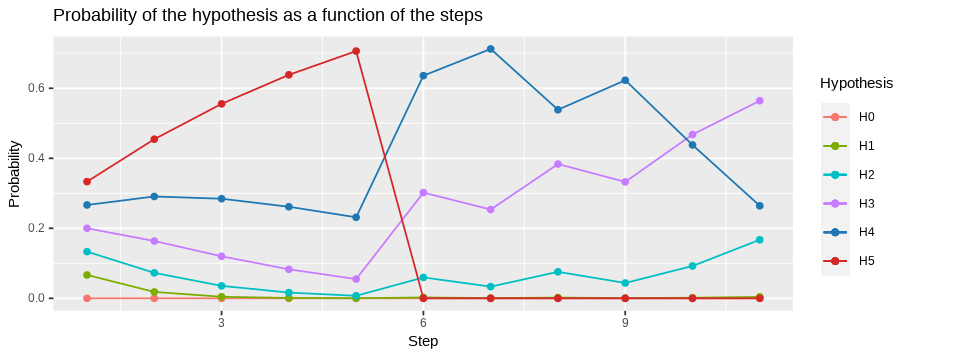

In [6]:
plt(results)

## Six Boxes Toy Model : simulation


- consider again the six boxes toy model of the previous exercise and write a simulation program that:


### selects a random box


In [7]:
#First I generate the 6 boxes with its content

b0 <- c('w','w','w','w','w') 
b1 <- c('w','w','w','w','b') %>% sample(5)  # For the boxes with mixed elements
b2 <- c('w','w','w','b','b') %>% sample(5)  # I suffle the content to loose the
b3 <- c('w','w','b','b','b') %>% sample(5)  # the positional knowledge
b4 <- c('w','b','b','b','b') %>% sample(5)
b5 <- c('b','b','b','b','b')


In [8]:
#Now I define a function than choose one of the boxes randomly
r_box <- function(){
    key <- runif(1)
    d   <- 1/6
    if (key <= d){
            box <- b0
    }else if (key > d && key <= 2*d){
            box <- b1
    }else if (key > 2*d && key <= 3*d){
            box <- b2
    }else if (key > 3*d && key <= 4*d){
            box <- b3
    }else if (key > 4*d && key <= 5*d){
            box <- b4
    }else if (key > 5*d && key <= d){
            box <- b5
    }
    return(box)
}


In [9]:
#We get the random box
box <- r_box();
box

### makes random sampling from the box


In [10]:
#Now I define a function that return n samples from a given box

b_sampling <- function(n,bx){
    sample <-vector(mode="character")
    for (i in c(1:n)){
        sample <- append(sample,sample(bx,1))
    }
    return(sample)
}

In [11]:
#Now we perform the random sampling

sm <- b_sampling(100,box)

### prints on the standard output the probability of selecting each box


In [12]:
#We initialize the prior
initial_prior <- rep(0.167,6)

#Initialize a tibble to keep the results
results <- tibble(
  k  = numeric(),
  H0 = numeric(),
  H1 = numeric(),
  H2 = numeric(),
  H3 = numeric(),
  H4 = numeric(),
  H5 = numeric()  
)

a <- initial_prior
for (i in c(1:length(sm))){
    measure <- sm[i]
    if (measure !='w' && measure !='b') {break}
    a <- SBTM(measure,a)
    results %<>% add_row(k = i, H0 = a[1], H1 = a[2], H2 = a[3],H3 = a[4],H4 = a[5],H5 = a[6])
}

In [13]:
results

k,H0,H1,H2,H3,H4,H5
1,0,6.666667e-02,1.333333e-01,2.000000e-01,0.266666667,0.3333333
2,0,1.818182e-02,7.272727e-02,1.636364e-01,0.290909091,0.4545455
3,0,4.444444e-03,3.555556e-02,1.200000e-01,0.284444444,0.5555556
4,0,1.021450e-03,1.634321e-02,8.273749e-02,0.261491318,0.6384065
5,0,2.259887e-04,7.231638e-03,5.491525e-02,0.231412429,0.7062147
6,0,4.874482e-05,3.119669e-03,3.553497e-02,0.199658786,0.7616378
7,0,1.032791e-05,1.321973e-03,2.258714e-02,0.169212497,0.8068681
8,0,2.159925e-06,5.529408e-04,1.417127e-02,0.141552857,0.8437208
9,0,4.473342e-07,2.290351e-04,8.804880e-03,0.117265983,0.8736997
10,0,9.196015e-08,9.416720e-05,5.430155e-03,0.096427210,0.8980484


### plots the probability for each box as a function of the number of trial


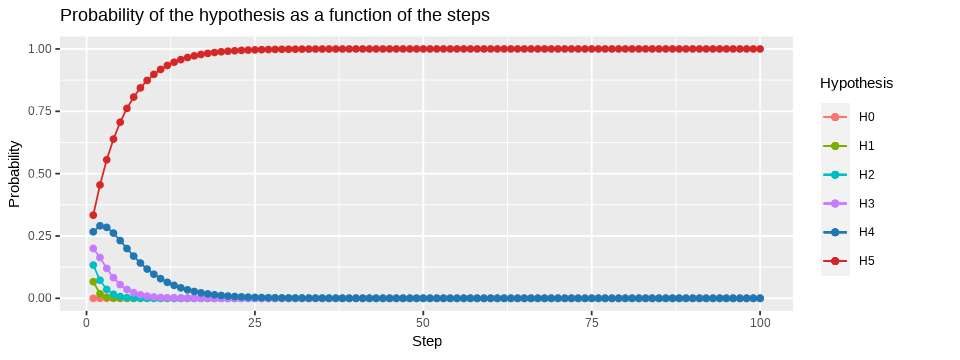

In [14]:
plt(results)

In [15]:
cat("The chosen box contained:",(box))

The chosen box contained: w w w w w

## Exercise

- An important property of the gamma distribution is the so-called reproductive property

- given a sequence of independent random variable $X_j ∼ Gamma(\alpha_j , \beta)$, it follows that

$$ Y = \sum_{j=1}^{n} X_j \rightarrow Y \sim \; \text{Gamma}(\alpha,\beta) \; \text{where} \; \alpha = \sum_{j=1}^n \alpha_j$$


-  if $\alpha = m$ is an integer, a random variable from gamma distribution $\text{Gamma}(m, \beta)$ (also known as Erlang distribution) can be obtained by summing $m$ independent exponential random variables $X_j \sim \text{Exp}(\beta)$:

$$ Y = \beta \sum_{j=1}^n (-\text{ln}U_j) = -\beta \prod_{j=1}^n U_j$$


- a) write an algorithm to sample variables from an Erlang distribution Gamma$(m, \beta)$


In [16]:
library(showtext)
showtext_auto()
library("scales")

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

In [17]:
# n is the number of elements to be drawn from the erlang distribution
# m is alpha from the Gamma distribution
# beta is beta from the Gamma distribution
rerlang <- function(n,m,beta){
    sample <-vector(mode="numeric")
    for (i in 1:n){
        sample <- append(sample,-sum(log(runif(m)))/beta)
    }
    return(sample)
    }
    

In [18]:
derlang <- function(x, m, b) {
    f <- dgamma(x, m, b)
    f
}

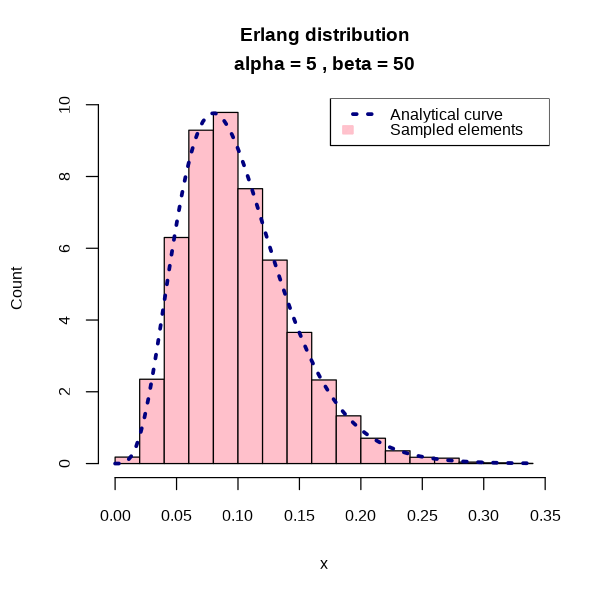

In [19]:
n <- 10000
m <- 5
beta <- 50

samples <- rerlang(n,m,beta)

set_plot_dimensions(5, 5)
hist(samples, breaks=20, freq=FALSE,
     col="pink",
     ylab="Count",
     xlab="x",
     main='Erlang distribution \nalpha = 5 , beta = 50')

curve(derlang(x, m,beta),
      col="navy", lt=3, lw=3, add=TRUE,)

legend("topright", legend = c("Analytical curve", "Sampled elements"),
       lt=3, lw=3,
       density=c(0,100),
       col = c("navy", NA),
       fill=c("navy", "pink"),
       border=c(NA,"pink"))

## Exercise

-  one of the first random number generator was proposed by von Neumann, the so-called middle square algorithm


-  write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number


-  Suggestion : after having squared the number, convert it to a list of characters

    $\texttt{(number <- unlist(strsplit(as.character(x.squared),"")))}$
    
    and, after having removed the head and tail of the list, convert it back to a number 
    
    $\texttt{(as.numeric(paste(number.after.trimming, collapse="")))}$


In [20]:
neuman <- function (seed) {
    options(scipen = 999) #This is to avoid scientific notation
    if(seed !=0){
        s_len <- floor(log10(seed)) + 1
        x     <-  as.numeric(unlist(strsplit(as.character(seed**2), "")))
        s2_len<- length(x)

        if (2*s_len != s2_len) {x <-c(0,x)}
        l <- length(x)/2
        return(as.numeric(paste(x[(l-1):(l+2)], collapse="")))
    }
    else {
        print("The seed is equal to cero")
    }
    
}

In [21]:
#Now we can print a sequence
seed <- 99
for (i in 1:100){
    print(seed) 
    seed <- neuman(seed)
    if (seed==0){break}
       
}

[1] 99
[1] 9801
[1] 596
[1] 5521
[1] 4814
[1] 1745
[1] 450
[1] 250
[1] 6250
[1] 625
[1] 9062
[1] 1198
[1] 4352
[1] 9399
[1] 3412
[1] 6417
[1] 1778
[1] 1612
[1] 5985
[1] 8202
[1] 2728
[1] 4419
[1] 5275
[1] 8256
[1] 1615
[1] 6082
[1] 9907
[1] 1486
[1] 2081
[1] 3305
[1] 9230
[1] 1929
[1] 7210
[1] 9841
[1] 8452
[1] 4363
[1] 357
[1] 2744
[1] 5295
[1] 370
[1] 3690
[1] 6161
[1] 9579
[1] 7572
[1] 3351
[1] 2292
[1] 2532
[1] 4110
[1] 8921
[1] 5842
[1] 1289
[1] 6615
[1] 7582
[1] 4867
[1] 6876
[1] 2793
[1] 8008
[1] 1280
[1] 6384
[1] 7554
[1] 629
[1] 9564
[1] 4700
[1] 900
[1] 1000
